<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble learning, hard voting

In [1]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# ... these are separatelly tunnable
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
ensemble = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [2]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.10, random_state=42) # noise 0.1 (was 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# ... these are separatelly tunnable
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
ensemble = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [3]:
from sklearn.tree import DecisionTreeClassifier
 
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.904


In [4]:
ensemble.append(('dt', dt_clf))

print(ensemble)

voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for _, clf in ensemble:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

print(voting_clf.__class__.__name__, accuracy_score(y_test, voting_clf.predict(X_test)))

[('lr', LogisticRegression(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('svc', SVC(random_state=42)), ('dt', DecisionTreeClassifier(max_depth=3))]
LogisticRegression 0.864
RandomForestClassifier 1.0
SVC 1.0
DecisionTreeClassifier 0.904
VotingClassifier 0.92


without logistic regression(without weekest clasiffier): 

In [9]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.10, random_state=42) # noise 0.1 (was 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# ... these are separatelly tunnable
# log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
ensemble = [('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 

from sklearn.metrics import accuracy_score
for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [10]:
ensemble.append(('dt', dt_clf))

print(ensemble)

voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for _, clf in ensemble:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

print(voting_clf.__class__.__name__, accuracy_score(y_test, voting_clf.predict(X_test)))

[('rf', RandomForestClassifier(random_state=42)), ('svc', SVC(random_state=42)), ('dt', DecisionTreeClassifier(max_depth=3))]
RandomForestClassifier 1.0
SVC 1.0
DecisionTreeClassifier 0.904
VotingClassifier 1.0


### Soft voting

In [14]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dt_clf = DecisionTreeClassifier(max_depth=3)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42, C=50)
ensemble = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
 
voting_clf = VotingClassifier(estimators=ensemble, voting='soft') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (dt_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.896
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.912


### Bagging and Pasting in Scikit

In [19]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dtc = DecisionTreeClassifier(max_depth=4)
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1) # n_jobs=-1 treniruosis ant visų branduolių
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [22]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dtc = DecisionTreeClassifier(max_depth=5) #max_depth=5
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=300, bootstrap=True, n_jobs=-1) # samples - 300
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912


In [23]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dtc = DecisionTreeClassifier(max_depth=5) #max_depth=5
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=300, bootstrap=False, n_jobs=-1) # bootstrap = True veikia geriau
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.888


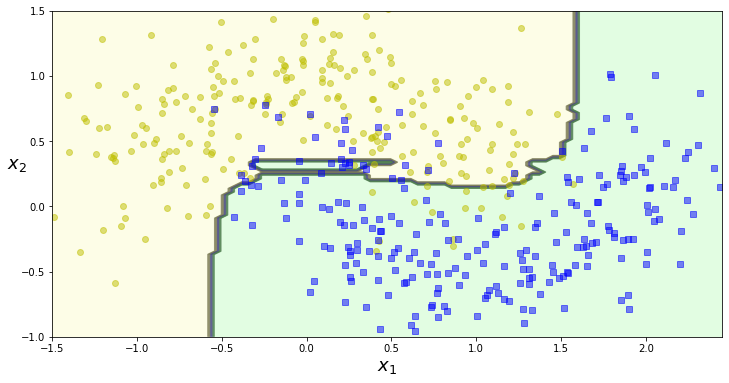

In [16]:
# ref: https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# TODO :: add the ability to plot decision boundaries based on unbounded number of features
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(12, 6))
plot_decision_boundary(bag_clf, X, y)
plt.show()

### OOB

In [24]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

dtc = DecisionTreeClassifier(max_depth=4)
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True) 
bag_clf.fit(X, y) 
y_pred = bag_clf.predict(X)

from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))
print(bag_clf.oob_score_)

0.914
0.886
